# Volcanic Forcings and Feedback
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geoscience, Princeton University

In [1]:
from lib.util import year_shift
import xlearn

%matplotlib notebook

In [2]:
# params
nino_ens = [1, 3, 4, 7, 9, 12, 17, 22, 26, 29]
nina_ens = [2, 5, 6, 8, 10, 11, 16, 23, 27, 30]
neut_ens = [13, 14, 15, 18, 19, 20, 21, 24, 25, 28]

In [4]:
# data
if 'das' in globals() or 'das' in locals():
    pass
else:
    das = dict()

volcs = ['Agung', 'StMaria', 'Pinatubo']
years = [1963, 1902, 1991]

# non-nudged
datanames = ('netrad_toa', 't_surf', 'precip')
for dataname in datanames:
    # volc
    ifiles = [f'data/{volc}_PI_ens_noleap.atmos_month.{dataname}.nc'
             for volc in volcs]
    for volc, ifile in zip(volcs, ifiles):
        key = f'{volc}_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).geo.fldmean()
            das[key] = da

        # NH 
        key_ = key + '_nh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
            das[key_] = da


        # SH
        key_ = key + '_sh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
            das[key_] = da


    # ctl
    ifile = f'data/CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
    for volc, year in zip(volcs, years):
        key = f'{volc}_ctl_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key] = da

        # NH 
        key_ = key + '_nh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key_] = da

        # SH
        key_ = key + '_sh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key_] = da


# nudged
datanames = ('netrad_toa',)
for dataname in datanames:
    # volc_nudge
    ifiles = [f'data/{volc}_ens_noleap_nudgeclimo_all_model1860.atmos_month.{dataname}.nc'
             for volc in volcs]
    for volc, ifile in zip(volcs, ifiles):
        key = f'{volc}_nudge_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).geo.fldmean()
            das[key] = da

        # NH 
        key_ = key + '_nh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
            das[key_] = da


        # SH
        key_ = key + '_sh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
            das[key_] = da

    # ctl_nudge
    ifile = f'data/nudgeclimo_all_model_CTL1860_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
    for volc, year in zip(volcs, years):
        key = f'{volc}_nudge_ctl_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key] = da

        # NH 
        key_ = key + '_nh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key_] = da


        # SH
        key_ = key + '_sh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key_] = da


	[Exists]: Agung_netrad_toa
	[Exists]: Agung_netrad_toa_nh
	[Exists]: Agung_netrad_toa_sh
StMaria_netrad_toa
StMaria_netrad_toa_nh
StMaria_netrad_toa_sh
Pinatubo_netrad_toa
Pinatubo_netrad_toa_nh
Pinatubo_netrad_toa_sh
Agung_ctl_netrad_toa


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_ctl_netrad_toa_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_ctl_netrad_toa_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_netrad_toa


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_netrad_toa_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_netrad_toa_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_ctl_netrad_toa


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_ctl_netrad_toa_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_ctl_netrad_toa_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_t_surf
Agung_t_surf_nh
Agung_t_surf_sh
StMaria_t_surf
StMaria_t_surf_nh
StMaria_t_surf_sh
Pinatubo_t_surf
Pinatubo_t_surf_nh
Pinatubo_t_surf_sh
Agung_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_ctl_t_surf_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_ctl_t_surf_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_t_surf_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_t_surf_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_ctl_t_surf_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_ctl_t_surf_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_precip
Agung_precip_nh
Agung_precip_sh
StMaria_precip
StMaria_precip_nh
StMaria_precip_sh
Pinatubo_precip
Pinatubo_precip_nh
Pinatubo_precip_sh
Agung_ctl_precip


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_ctl_precip_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_ctl_precip_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_precip


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_precip_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_precip_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_ctl_precip


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_ctl_precip_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_ctl_precip_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_nudge_netrad_toa
Agung_nudge_netrad_toa_nh
Agung_nudge_netrad_toa_sh
StMaria_nudge_netrad_toa
StMaria_nudge_netrad_toa_nh
StMaria_nudge_netrad_toa_sh
Pinatubo_nudge_netrad_toa
Pinatubo_nudge_netrad_toa_nh
Pinatubo_nudge_netrad_toa_sh
Agung_nudge_ctl_netrad_toa


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_nudge_ctl_netrad_toa_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_nudge_ctl_netrad_toa_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_nudge_ctl_netrad_toa


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_nudge_ctl_netrad_toa_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_nudge_ctl_netrad_toa_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_nudge_ctl_netrad_toa


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_nudge_ctl_netrad_toa_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_nudge_ctl_netrad_toa_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


## netrad_toa

<IPython.core.display.Javascript object>


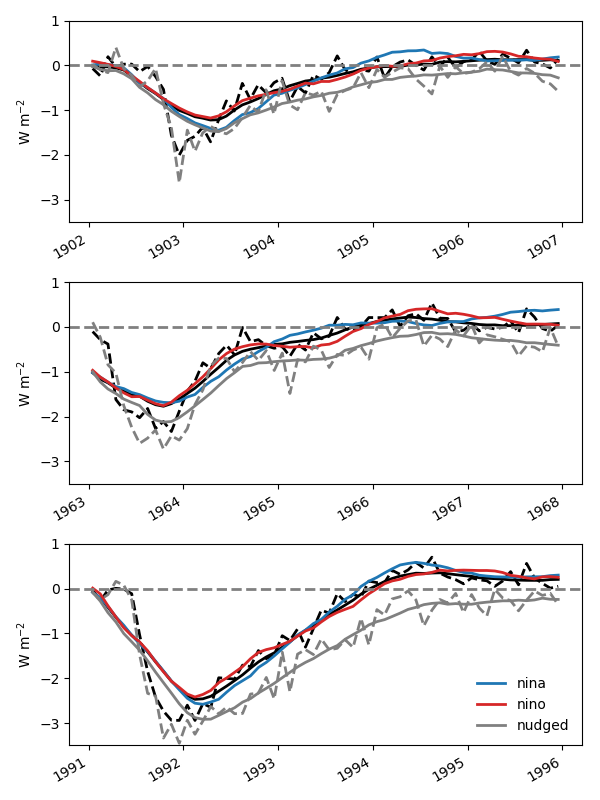

In [96]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharey=True)
dataname = 'netrad_toa'
units = 'W m$^{-2}$'

ax = axes[0]
volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='k', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .mean('en').plot(color='k', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nina_ens).mean('en').plot(color='C0', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nino_ens).mean('en').plot(color='C3', ax=ax)

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='gray', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .mean('en').plot(color='gray', ax=ax)

# ax.set_ylim(-3.5, 1)
ax.axhline(0, ls='--', color='gray')
ax.set_xlabel('')
ax.set_ylabel(units)

ax = axes[1]
volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='k', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .mean('en').plot(color='k', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nina_ens).mean('en').plot(color='C0', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nino_ens).mean('en').plot(color='C3', ax=ax)

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='gray', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean().mean('en').plot(color='gray', ax=ax)

# ax.set_ylim(-3.5, 1)
ax.axhline(0, ls='--', color='gray')
ax.set_xlabel('')
ax.set_ylabel(units)

ax = axes[2]
volc = 'Pinatubo'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='k', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .mean('en').plot(color='k', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nina_ens).mean('en').plot(color='C0', ax=ax, label='nina')
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nino_ens).mean('en').plot(color='C3', ax=ax, label='nino')

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='gray', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean().mean('en').plot(color='gray', ax=ax, label='nudged')

# ax.set_ylim(-3.5, 1)
ax.axhline(0, ls='--', color='gray')
ax.set_xlabel('')
ax.set_ylabel(units)
ax.legend()
ax.set_ylim(-3.5, 1)

plt.tight_layout()

figname = f'figs/fig_{dataname}.pdf'
plt.savefig(figname)

## t_surf

In [196]:
# data
dataname = 't_surf'
volcs = ['Agung', 'StMaria', 'Pinatubo']
years = [1963, 1902, 1991]

# volc
ifiles = [f'data/{volc}_PI_ens_noleap.atmos_month.{dataname}.nc'
         for volc in volcs]
for volc, ifile in zip(volcs, ifiles):
    key = f'{volc}_{dataname}'
    print(key)
    da = xr.open_dataarray(ifile).geo.fldmean()
    das[key] = da
    
    # NH 
    key_ = key + '_nh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
    das[key_] = da
    
    # SH
    key_ = key + '_sh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
    das[key_] = da

# ctl
ifile = f'data/CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
for volc, year in zip(volcs, years):
    key = f'{volc}_ctl_{dataname}'
    print(key)
    da = xr.open_dataarray(ifile).geo.fldmean()
    da = year_shift(da, n=year-1, to_datetime=True)
    das[key] = da
    
    # NH 
    key_ = key + '_nh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
    da = year_shift(da, n=year-1, to_datetime=True)
    das[key_] = da
    
    # SH
    key_ = key + '_sh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
    da = year_shift(da, n=year-1, to_datetime=True)
    das[key_] = da

# volc_nudge
ifiles = [f'data/{volc}_ens_noleap_nudgeclimo_all_model1860.atmos_month.{dataname}.nc'
         for volc in volcs]
for volc, ifile in zip(volcs, ifiles):
    key = f'{volc}_nudge_{dataname}'
    print(key)
    da = xr.open_dataarray(ifile).geo.fldmean()
    das[key] = da
    
    # NH 
    key_ = key + '_nh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
    das[key_] = da
    
    # SH
    key_ = key + '_sh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
    das[key_] = da

# ctl_nudge
ifile = f'data/nudgeclimo_all_model_CTL1860_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
for volc, year in zip(volcs, years):
    key = f'{volc}_nudge_ctl_{dataname}'
    print(key)
    da = xr.open_dataarray(ifile).geo.fldmean()
    da = year_shift(da, n=year-1, to_datetime=True)
    das[key] = da
    
    # NH 
    key_ = key + '_nh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
    da = year_shift(da, n=year-1, to_datetime=True)
    das[key_] = da
    
    # SH
    key_ = key + '_sh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
    da = year_shift(da, n=year-1, to_datetime=True)
    das[key_] = da

Agung_t_surf
Agung_t_surf_nh
Agung_t_surf_sh
StMaria_t_surf
StMaria_t_surf_nh
StMaria_t_surf_sh
Pinatubo_t_surf
Pinatubo_t_surf_nh
Pinatubo_t_surf_sh
Agung_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_ctl_t_surf_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_ctl_t_surf_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_t_surf_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_t_surf_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_ctl_t_surf_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_ctl_t_surf_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_nudge_t_surf
Agung_nudge_t_surf_nh
Agung_nudge_t_surf_sh
StMaria_nudge_t_surf
StMaria_nudge_t_surf_nh
StMaria_nudge_t_surf_sh
Pinatubo_nudge_t_surf
Pinatubo_nudge_t_surf_nh
Pinatubo_nudge_t_surf_sh
Agung_nudge_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_nudge_ctl_t_surf_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_nudge_ctl_t_surf_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_nudge_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_nudge_ctl_t_surf_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_nudge_ctl_t_surf_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_nudge_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_nudge_ctl_t_surf_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_nudge_ctl_t_surf_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


<IPython.core.display.Javascript object>


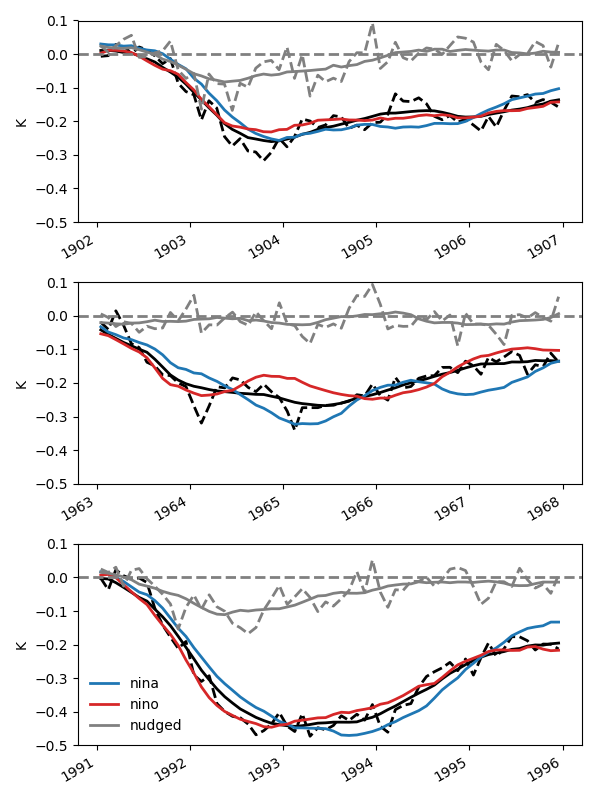

In [151]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharey=True)
dataname = 't_surf'
units = 'K'

ax = axes[0]
volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='k', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .mean('en').plot(color='k', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nina_ens).mean('en').plot(color='C0', ax=ax, label='nina')
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nino_ens).mean('en').plot(color='C3', ax=ax, label='nino')

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='gray', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean().mean('en').plot(color='gray', ax=ax)

# ax.set_ylim(-3.5, 1)
ax.axhline(0, ls='--', color='gray')
ax.set_xlabel('')
ax.set_ylabel(units)

ax = axes[1]
volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='k', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .mean('en').plot(color='k', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nina_ens).mean('en').plot(color='C0', ax=ax, label='nina')
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nino_ens).mean('en').plot(color='C3', ax=ax, label='nino')

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='gray', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean().mean('en').plot(color='gray', ax=ax)

# ax.set_ylim(-3.5, 1)
ax.axhline(0, ls='--', color='gray')
ax.set_xlabel('')
ax.set_ylabel(units)

ax = axes[2]
volc = 'Pinatubo'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='k', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .mean('en').plot(color='k', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nina_ens).mean('en').plot(color='C0', ax=ax, label='nina')
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nino_ens).mean('en').plot(color='C3', ax=ax, label='nino')

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='gray', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean().mean('en').plot(color='gray', ax=ax, label='nudged')

# ax.set_ylim(-3.5, 1)
ax.axhline(0, ls='--', color='gray')
ax.set_xlabel('')
ax.set_ylabel(units)
ax.legend()
ax.set_ylim(-.5, .1)

plt.tight_layout()

figname = f'figs/fig_{dataname}.pdf'
plt.savefig(figname)

## netrad_toa vs t_surf

t_surf integrated vs. netrad_toa integrated

<IPython.core.display.Javascript object>


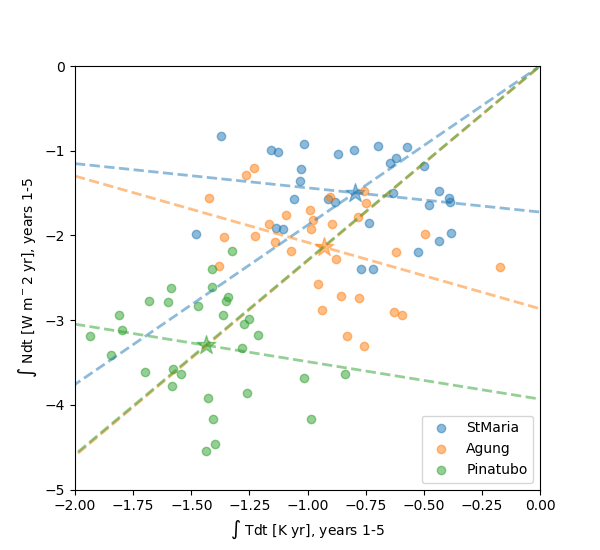

In [144]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
xmin, xmax = -2, 0

volc = 'StMaria'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C0', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C0', s=200, alpha=alpha)
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C0', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C0', alpha=alpha, ls='--')

volc = 'Agung'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C1', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C1', s=200, alpha=alpha)
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C1', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C1', alpha=alpha, ls='--')

volc = 'Pinatubo'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C2', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C2', s=200, alpha=alpha)
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C2', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C2', alpha=alpha, ls='--')

ax.set_xlim(-2, 0)
ax.set_ylim(-5, 0)
ax.set_xlabel(f'$\int$ Tdt [K yr], years 1-{n_years}')
ax.set_ylabel(f'$\int$ Ndt [W m$^{-2}$ yr], years 1-{n_years}')
plt.legend(frameon=True, loc='lower right')
# ax.set_title(f'{n_years} years')

figname = f'figs/fig_scatter_Ts_vs_N_years1to{n_years}.pdf'
plt.savefig(figname)

t_surf  vs. netrad_toa  integrated

<IPython.core.display.Javascript object>


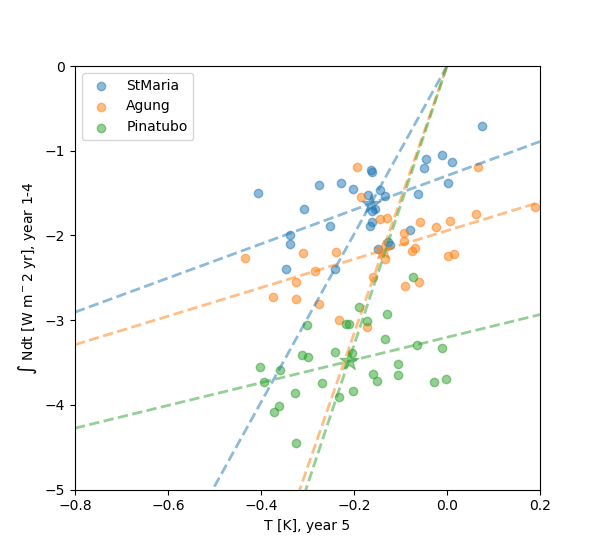

In [140]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 4
xmin, xmax = -.8, .2

volc = 'StMaria'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(n_years*12, n_years*12+12)).mean('time')

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C0', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C0', s=200, alpha=alpha)
plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls='--', color='C0', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C0', alpha=alpha, ls='--')

volc = 'Agung'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(n_years*12, n_years*12+12)).mean('time')

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C1', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C1', s=200, alpha=alpha)
plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls='--', color='C1', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C1', alpha=alpha, ls='--')

volc = 'Pinatubo'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(n_years*12, n_years*12+12)).mean('time')

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C2', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C2', s=200, alpha=alpha)
plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls='--', color='C2', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C2', alpha=alpha, ls='--')

ax.set_xlim(xmin, xmax)
ax.set_ylim(-5, 0)
ax.set_xlabel(f'T [K], year {n_years+1}')
ax.set_ylabel(f'$\int$ Ndt [W m$^{-2}$ yr], year 1-{n_years}')
plt.legend(frameon=True, loc='upper left')
# ax.set_title(f'{n_years} years')

figname = f'figs/fig_scatter_Ts{n_years+1}_vs_N1to{n_years}.pdf'
plt.savefig(figname)

F-N integrated vs. T integrated

<IPython.core.display.Javascript object>


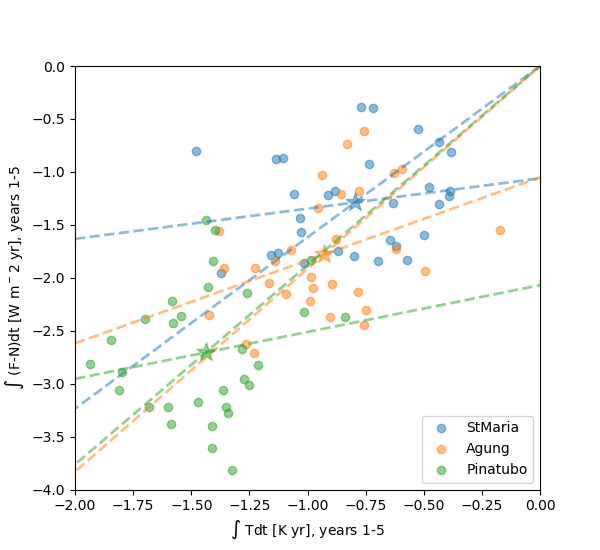

beta StMaria <xarray.DataArray ()>
array(1.6184510258773708)
beta Agung <xarray.DataArray ()>
array(1.9160061814978755)
beta Pinatubo <xarray.DataArray ()>
array(1.8820725516049526)


In [150]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
xmin, xmax = -2, 0

volc = 'StMaria'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en') - da
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C0', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C0', s=200, alpha=alpha)
print('beta', volc, day.mean()/dax.mean())
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C0', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C0', alpha=alpha, ls='--')

volc = 'Agung'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en') - da
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C1', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C1', s=200, alpha=alpha)
print('beta', volc, day.mean()/dax.mean())
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C1', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C1', alpha=alpha, ls='--')

volc = 'Pinatubo'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en') - da
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C2', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C2', s=200, alpha=alpha)
print('beta', volc, day.mean()/dax.mean())
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C2', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C2', alpha=alpha, ls='--')

ax.set_xlim(-2, 0)
ax.set_ylim(-4, 0)
ax.set_xlabel(f'$\int$ Tdt [K yr], years 1-{n_years}')
ax.set_ylabel(f'$\int$ (F-N)dt [W m$^{-2}$ yr], years 1-{n_years}')
plt.legend(frameon=True, loc='lower right')
# ax.set_title(f'{n_years} years')

figname = f'figs/fig_scatter_Ts_vs_FmN_years1to{n_years}.pdf'
plt.savefig(figname)

 < T > vs < F >

<IPython.core.display.Javascript object>


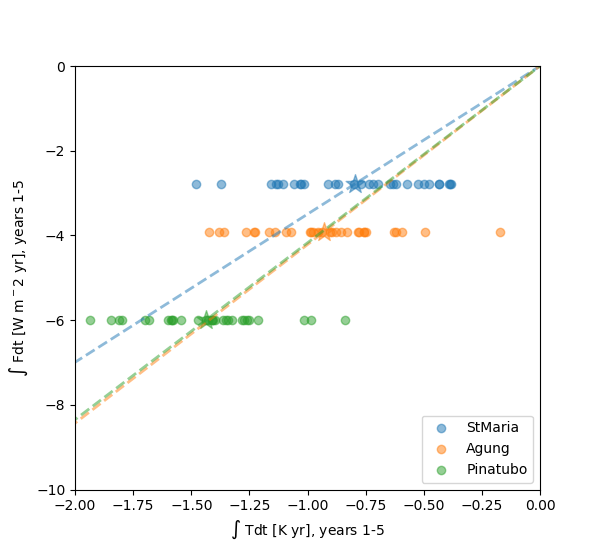

In [166]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
xmin, xmax = -2, 0

volc = 'StMaria'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en')
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, [day,]*30, label=volc, color='C0', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C0', s=200, alpha=alpha)
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C0', alpha=alpha)

volc = 'Agung'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en')
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, [day,]*30, label=volc, color='C1', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C1', s=200, alpha=alpha)
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C1', alpha=alpha)


volc = 'Pinatubo'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en')
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, [day,]*30, label=volc, color='C2', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C2', s=200, alpha=alpha)
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C2', alpha=alpha)

ax.set_xlim(-2, 0)
ax.set_ylim(-10, 0)
ax.set_xlabel(f'$\int$ Tdt [K yr], years 1-{n_years}')
ax.set_ylabel(f'$\int$ Fdt [W m$^{-2}$ yr], years 1-{n_years}')
plt.legend(frameon=True, loc='lower right')
# ax.set_title(f'{n_years} years')

figname = f'figs/fig_scatter_Ts_F_years1to{n_years}.pdf'
# plt.savefig(figname)

<IPython.core.display.Javascript object>


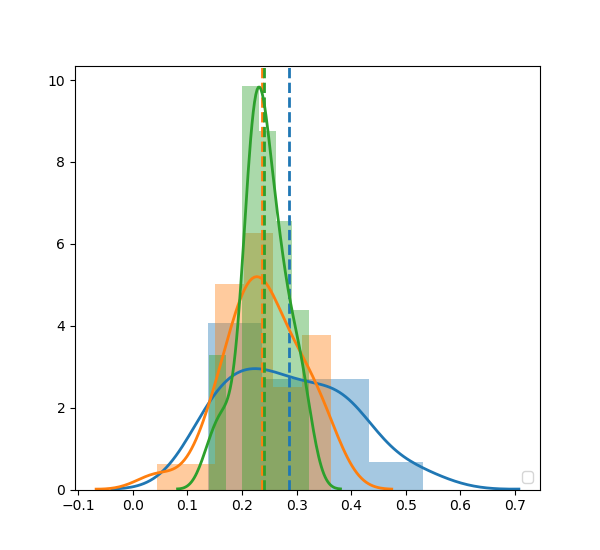

No handles with labels found to put in legend.


In [180]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
xmin, xmax = -2, 0

volc = 'StMaria'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en')
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

sns.distplot(dax/day)
plt.axvline((dax/day).mean(), ls='--', color='C0')

volc = 'Agung'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en')
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

sns.distplot(dax/day)
plt.axvline((dax/day).mean(), ls='--', color='C1')

volc = 'Pinatubo'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en')
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

sns.distplot(dax/day)
plt.axvline((dax/day).mean(), ls='--', color='C2')

# ax.set_xlim(-2, 0)
# ax.set_ylim(-10, 0)
# ax.set_xlabel(f'$\int$ Tdt [K yr], years 1-{n_years}')
# ax.set_ylabel(f'$\int$ Fdt [W m$^{-2}$ yr], years 1-{n_years}')
plt.legend(frameon=True, loc='lower right')
# ax.set_title(f'{n_years} years')

figname = f'figs/fig_scatter_Ts_F_years1to{n_years}.pdf'
# plt.savefig(figname)

## Figs

### global mean series

<IPython.core.display.Javascript object>


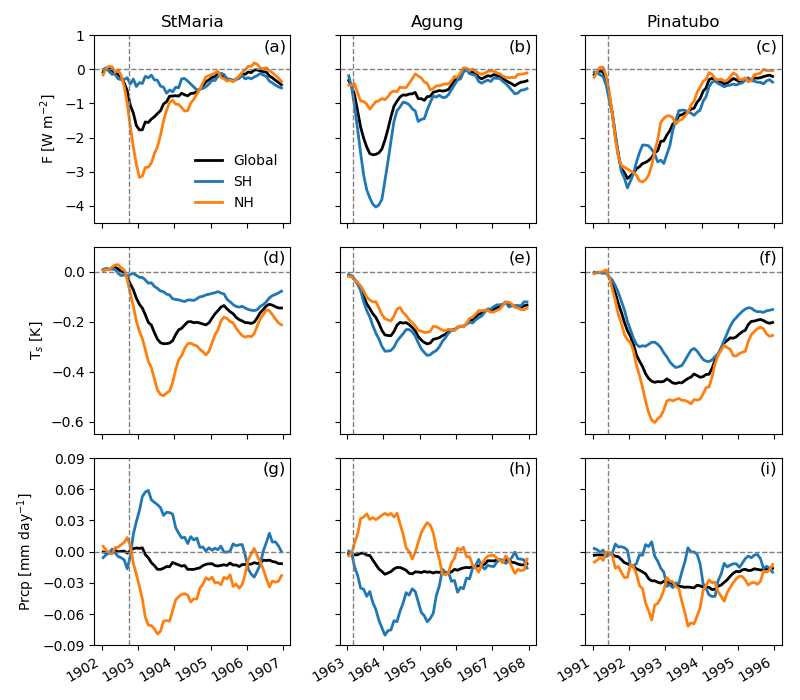

No handles with labels found to put in legend.


In [292]:
# plot
fig, axes = plt.subplots(3, 3, figsize=(8, 7), sharey='row', sharex='col')
n_running = 5
volc_dates = dict(StMaria=(1902, 10), Agung=(1963, 3), Pinatubo=(1991, 6))
axline = dict(color='gray', lw=1, ls='--')
textkw = dict(x=.98, y=.98, ha='right', va='top', fontsize='large')

# 
dataname = 'netrad_toa'
units = 'F [W m$^{-2}$]'
ylim = -4.5, 1
ax = axes[0, 0]
volc = 'StMaria'

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax,
                                                                             label='Global')
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax,
                                                                             label='SH')
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax,
                                                                             label='NH')



ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel(units)
ax.set_title(volc)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(a)', transform=ax.transAxes, **textkw)
ax.legend()

ax = axes[0, 1]
volc = 'Agung'

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)


ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(volc)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(b)', transform=ax.transAxes, **textkw)

ax = axes[0, 2]
volc = 'Pinatubo'

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)


ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend()
ax.set_ylim(ylim)
ax.set_title(volc)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(c)', transform=ax.transAxes, **textkw)

#
dataname = 't_surf'
units = 'T$_s$ [K]'
ylim = -.65, .1
ax = axes[1, 0]
volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)

ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel(units)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(d)', transform=ax.transAxes, **textkw)

ax = axes[1, 1]
volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)



ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(e)', transform=ax.transAxes, **textkw)

ax = axes[1, 2]
volc = 'Pinatubo'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)


ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_ylim(ylim)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(f)', transform=ax.transAxes, **textkw)

#
dataname = 'precip'
units = 'Prcp [mm day$^{-1}$]'
scale = 24*3600
ylim = -.09, .09
yticks = np.arange(-.09, .091, .03)

ax = axes[2, 0]
volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)

ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel(units)
ax.set_ylim(ylim)
ax.set_yticks(yticks)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(g)', transform=ax.transAxes, **textkw)

# #
ax = axes[2, 1]
volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)

ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(h)', transform=ax.transAxes, **textkw)

# #
ax = axes[2, 2]
volc = 'Pinatubo'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)

ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(i)', transform=ax.transAxes, **textkw)



plt.tight_layout()
figname = f'figs/fig_series_FTP.pdf'
plt.savefig(figname)

### scatter plot of N(F) vs. Ts

<IPython.core.display.Javascript object>


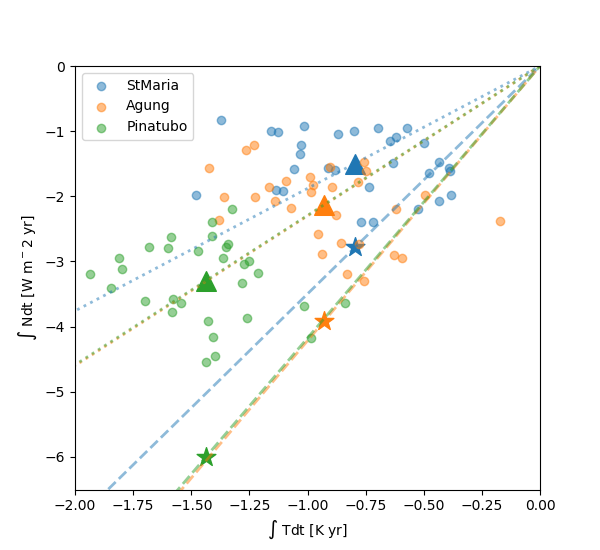

StMaria
sensitivity 0.2858715812985987 K/(W $^{-2}$)
beta 1.6184510258773708
lambda 1.8796231634401033

Agung
sensitivity 0.23714702813669605 K/(W $^{-2}$)
beta 1.9160061814978777
lambda 2.300787121193569

Pinatubo
sensitivity 0.23950577487447391 K/(W $^{-2}$)
beta 1.8820725516049504
lambda 2.2931921180010524



In [300]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
xmin, xmax = -2, 0
ymin, ymax = -6.5, 0

# 
volc = 'StMaria'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en')
dayF = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C0', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='^', color='C0', s=200)
plt.scatter(dax.mean(), dayF, marker='*', color='C0', s=200)
plt.plot([dax.mean()*5, 0], [dayF*5, 0], ls='--', color='C0', alpha=alpha)
plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls=':', color='C0', alpha=alpha)
# plt.plot([dax.mean(), 0], [day.mean(), dayF], ls=':', color='C0', alpha=alpha)
print(volc)
print('sensitivity', dax.mean().item()/dayF.item(), 'K/(W $^{-2}$)')
print('beta', (dayF - day.mean()).item()/dax.mean().item())
print('lambda', day.mean().item()/dax.mean().item())
print()


# 
volc = 'Agung'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en') 
dayF = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C1', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='^', color='C1', s=200)
plt.scatter(dax.mean(), dayF, marker='*', color='C1', s=200)
plt.plot([dax.mean()*5, 0], [dayF*5, 0], ls='--', color='C1', alpha=alpha)
plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls=':', color='C1', alpha=alpha)
# plt.plot([dax.mean(), 0], [day.mean(), dayF], ls=':', color='C0', alpha=alpha)
print(volc)
print('sensitivity', dax.mean().item()/dayF.item(), 'K/(W $^{-2}$)')
print('beta', (dayF - day.mean()).item()/dax.mean().item())
print('lambda', day.mean().item()/dax.mean().item())
print()


# 
volc = 'Pinatubo'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en') 
dayF = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C2', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='^', color='C2', s=200)
plt.scatter(dax.mean(), dayF, marker='*', color='C2', s=200)
plt.plot([dax.mean()*5, 0], [dayF*5, 0], ls='--', color='C2', alpha=alpha)
plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls=':', color='C2', alpha=alpha)
# plt.plot([dax.mean(), 0], [day.mean(), dayF], ls=':', color='C0', alpha=alpha)
print(volc)
print('sensitivity', dax.mean().item()/dayF.item(), 'K/(W $^{-2}$)')
print('beta', (dayF - day.mean()).item()/dax.mean().item())
print('lambda', day.mean().item()/dax.mean().item())
print()


ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# ax.set_xlabel(f'$\int$ Tdt [K yr], years 1-{n_years}')
# ax.set_ylabel(f'$\int$ Ndt [W m$^{-2}$ yr], years 1-{n_years}')
ax.set_xlabel(f'$\int$ Tdt [K yr]')
ax.set_ylabel(f'$\int$ Ndt [W m$^{-2}$ yr]')
plt.legend(frameon=True, loc='upper left')
# ax.set_title(f'{n_years} years')

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
plt.savefig(figname)